## Anomaly Detection using Iris Dataset

In [1]:
#Use Randomforest algorithm to detect the anomaly


In [2]:
#import the libraries
import numpy as np
import pandas as pd
import sklearn
import scipy
import seaborn as sns
import matplotlib.pyplot as plot
from sklearn.metrics import classification_report,accuracy_score


In [6]:
# load the data
data = pd.read_csv('iris.csv',sep=',')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
#check the number fo columns
print(data.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [15]:
print(data.shape)

(150, 5)


In [17]:
#Data values count
data['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [9]:
data.isnull().values.any()

False

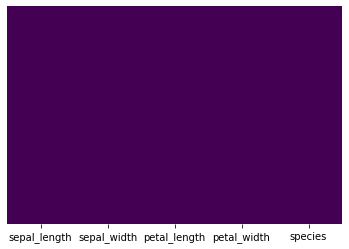

In [11]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

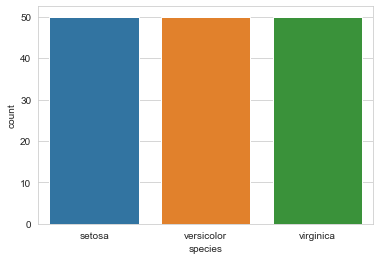

In [12]:
#check the number of uniques species of the flower
sns.set_style('whitegrid')
sns.countplot(x='species', data=data)

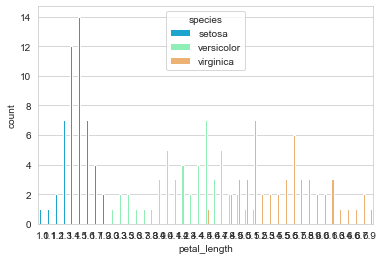

In [24]:
#Countplot on the basis of petal length
sns.set_style('whitegrid')
sns.countplot(x='petal_length',hue='species',data=data,palette='rainbow')

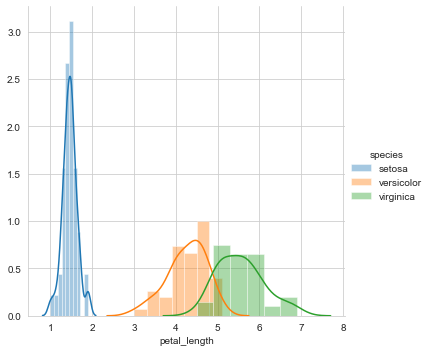

In [26]:
sns.FacetGrid(data,hue='species',height=5).map(sns.distplot,"petal_length").add_legend()


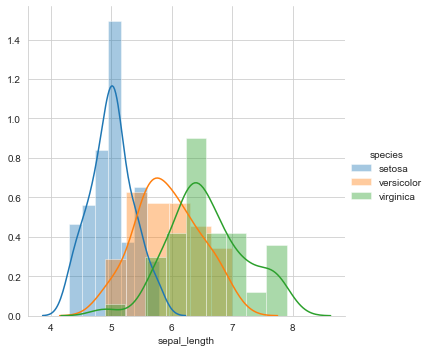

In [27]:
sns.FacetGrid(data,hue='species',height=5).map(sns.distplot,"sepal_length").add_legend()

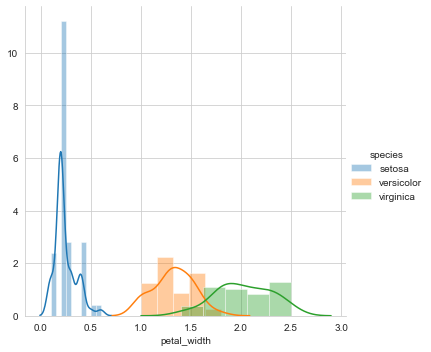

In [28]:
sns.FacetGrid(data,hue='species',height=5).map(sns.distplot,"petal_width").add_legend()

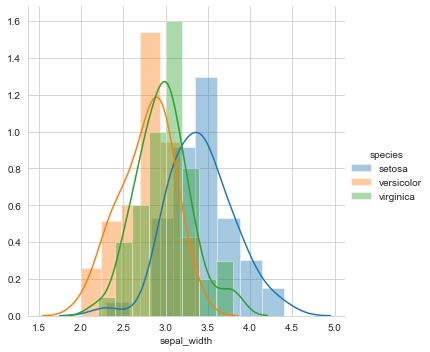

In [29]:
sns.FacetGrid(data,hue='species',height=5).map(sns.distplot,"sepal_width").add_legend()

In [31]:
#Insert outlier dummy values and load the data 
iris_anomaly = pd.read_csv('iris_anomaly.csv',sep=',')
iris_anomaly.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [34]:
#Check the shape and size of the data
print(iris_anomaly.shape)

(156, 5)


In [35]:
print(iris_anomaly.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [36]:
iris_anomaly['species'].value_counts()

setosa        52
versicolor    52
virginica     52
Name: species, dtype: int64

In [38]:
#check for null values
iris_anomaly.isnull().values.any()

False

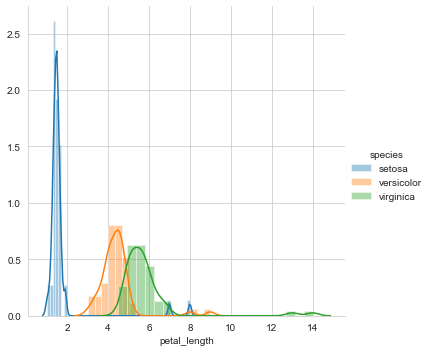

In [40]:
sns.FacetGrid(iris_anomaly,hue='species',height=5).map(sns.distplot,"petal_length").add_legend()

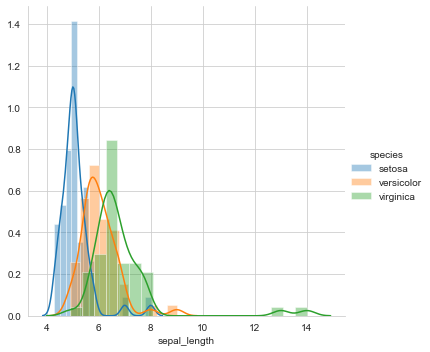

In [41]:
sns.FacetGrid(iris_anomaly,hue='species',height=5).map(sns.distplot,"sepal_length").add_legend()

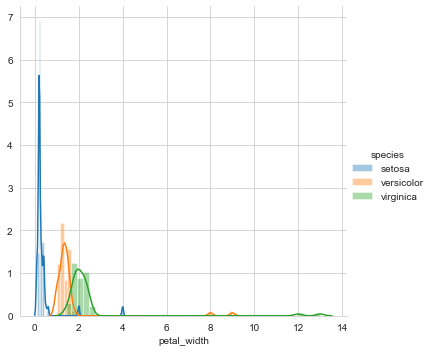

In [42]:
sns.FacetGrid(iris_anomaly,hue='species',height=5).map(sns.distplot,"petal_width").add_legend()

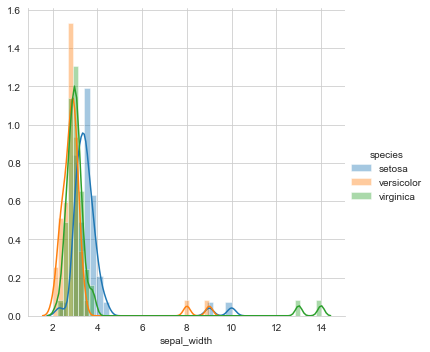

In [43]:
sns.FacetGrid(iris_anomaly,hue='species',height=5).map(sns.distplot,"sepal_width").add_legend()

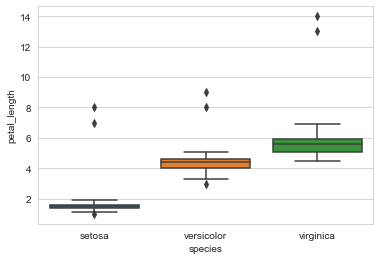

In [44]:
#detect outliers using boxplot
sns.boxplot(x='species',y='petal_length',data=iris_anomaly)

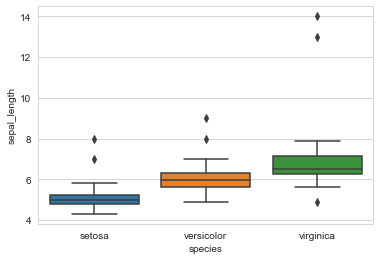

In [45]:
sns.boxplot(x='species',y='sepal_length',data=iris_anomaly)

In [49]:
#Random forest model to check for the outlier and the model prediction
#Feature engineering
iris_anomaly.species[iris_anomaly.species == 'setosa'] = 1
iris_anomaly.species[iris_anomaly.species == 'versicolor'] = 2
iris_anomaly.species[iris_anomaly.species == 'virginica'] = 3

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [50]:
iris_anomaly.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [52]:
#define Dependent variable
y = iris_anomaly['species'].values

In [54]:
iris_anomaly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 5 columns):
sepal_length    156 non-null float64
sepal_width     156 non-null float64
petal_length    156 non-null float64
petal_width     156 non-null float64
species         156 non-null object
dtypes: float64(4), object(1)
memory usage: 6.2+ KB


In [55]:
#convert species into object
y = y.astype('int')

In [60]:
#Check after converting the object
type(y)

numpy.ndarray

In [57]:
#define independent variable
x = iris_anomaly.drop(labels=['species'],axis=1)


In [58]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [68]:
#split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=20)


In [69]:
#Run RandomForest from ensemble
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10, random_state=30)
model.fit(x_train,y_train)




RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

In [70]:
#test in the dataset
prediction_test = model.predict(x_test)


In [66]:
print(prediction_test)

[3 1 3 3 2 3 2 1 2 1 3 2 2 1 1 2 1 2 3 2 3 2 3 1 3 2 2 1 2 3 3 2 1 1 1 3 2
 1 2 1 2 3 3 1 2 2 1 1 2 1 3 2 1 1 2 3 2 2 1 2 3 2 2]


In [71]:
#compare the trainin result with teh test result
from sklearn import metrics
print("Accuracy = ",metrics.accuracy_score(y_test,prediction_test))

Accuracy =  0.96875
